In [ ]:
import pandas as pd #импорт библиотеки pandas по именем pd - библиотека для работы с dataset
data = pd.read_csv('https://query.data.world/s/qq2jvj4pyj6zakmcppywdub6tj4u6x') #подключние database
data [10:25] # вывод с 10 строки по 25

In [10]:
#приведение в числовой вид
data['StatusCode']=(data['Status']=="Survivor").astype(int) #astype - задание типа столбца (фичи)
data['GenderCode']=(data['Gender']=="Male").astype(int)

In [16]:
#создание возростных групп
data['AgeGroup']=data['Age']
data['AgeGroup'].fillna(-1, inplace=True)#замена неизвестных значений на -1
data['AgeGroup']=data['AgeGroup'].map(lambda age: int(age//10)+1)#создание возростной группы с промежутком по 10 лет

In [17]:
#удаление не нужных строк
del data['Disembarked at']
del data['Home Country']
del data['Year of Birth']
del data['Class / Department']
del data['Job']
del data['Job details']
del data['Ticket Number']
del data['Fare Price']
del data['Profile on Encyclopedia Titanica']

In [18]:
#вывод после удаления строк
data [10:25]

,Titanic passager,Status,Age,Crew or Passenger?,Gender,Embarked,StatusCode,GenderCode,AgeGroup
10,"PARKER, Mr Clifford Richard",Victim,28.0,Passenger,Male,Southampton,0,1,3
11,"MITCHELL, Mr Henry Michael",Victim,71.0,Passenger,Male,Southampton,0,1,8
12,"PAIN, Dr Alfred",Victim,23.0,Passenger,Male,Southampton,0,1,3
13,"LEYSON, Mr Robert William Norman",Victim,25.0,Passenger,Male,Southampton,0,1,3
14,"WHEADON, Mr Edward H.",Victim,66.0,Passenger,Male,Southampton,0,1,7
15,"BAINBRIGGE, Mr Charles Robert",Victim,23.0,Passenger,Male,Southampton,0,1,3
16,"OXENHAM, Mr Percy Thomas",Survivor,22.0,Passenger,Male,Southampton,1,1,3
17,"KVILLNER, Mr Johan Henrik Johannesson",Victim,31.0,Passenger,Male,Southampton,0,1,4
18,"ANDREW, Mr Frank Thomas",Victim,25.0,Passenger,Male,Southampton,0,1,3
19,"BANFIELD, Mr Frederick James",Victim,28.0,Passenger,Male,Southampton,0,1,3


In [49]:
#создание dataset, отображающего зависимость пола и статуса выживания
Gender_by_status=data.groupby(['Gender','Status']) #группировка по столбцу
Gender_by_status=Gender_by_status.size().unstack() #создание из стобцов отдельного dataset
Gender_by_status

Status,Survivor,Victim
Gender,,
Female,359,130
Male,352,1366


In [50]:
#создание dataset, отображающего зависимость принадлежности к возростной группе и статуса выживания
Age_by_status=data.groupby(['AgeGroup','Status'])
Age_by_status=Age_by_status.size().unstack()
Age_by_status.fillna(0, inplace=True)
Age_by_status

Status,Survivor,Victim
AgeGroup,,
0,0.0,4.0
1,54.0,40.0
2,70.0,160.0
3,256.0,576.0
4,185.0,438.0
5,104.0,183.0
6,32.0,61.0
7,10.0,29.0
8,0.0,5.0


In [51]:
#создание dataset, отображающего зависимость места посадки на корабль и статуса выживания
Embarked_by_status=data.groupby(['Embarked','Status'])
Embarked_by_status=Embarked_by_status.size().unstack()
Embarked_by_status

Status,Survivor,Victim
Embarked,,
Belfast,43,155
Cherbourg,154,118
Queenstown,44,79
Southampton,470,1144


In [52]:
#создание dataset, отображающего зависимость роль на корабле и статуса выживания
Cr_or_pas_by_status=data.groupby(['Crew or Passenger?','Status'])
Cr_or_pas_by_status=Cr_or_pas_by_status.size().unstack()
Cr_or_pas_by_status

Status,Survivor,Victim
Crew or Passenger?,,
Crew,211,679
Passenger,500,817


In [53]:
#создание dataset, отображающего зависимость роль на корабле и статуса выживания
Cr_or_pas_by_gender=data.groupby(['Crew or Passenger?','Gender'])
Cr_or_pas_by_gender=Cr_or_pas_by_gender.size().unstack()
Cr_or_pas_by_gender

Gender,Female,Male
Crew or Passenger?,,
Crew,23,1081
Passenger,481,871


In [54]:
#создание способа перевода данных в процентные соотношения
def map_to_percent(r):
    return [float(v)/sum(r) for v in r]

In [55]:
#импорт библиотеки seaborn по именем sb - библиотека для тепловой карты
import seaborn as sb

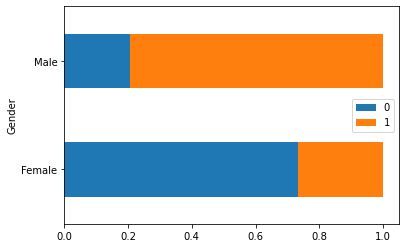

In [56]:
#График вероятнотных соотношений статуса выживания и пола
Gender_by_status.apply(map_to_percent,axis=1,result_type='expand').plot(kind='barh',stacked=True)#apply - приведение к процентному соотношению plot - построение граифка

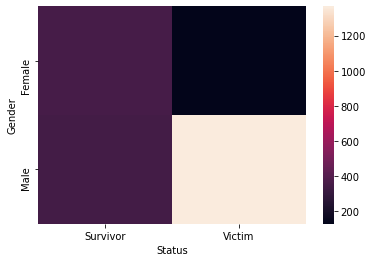

In [57]:
#Тепловая карта - Гендер - Статус
sb.heatmap(Gender_by_status)

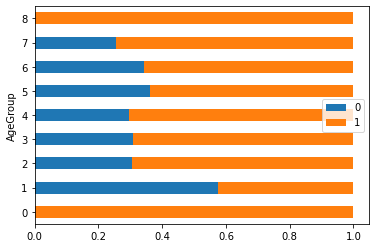

In [58]:
#График вероятнотных соотношений статуса выживания ивозростной группы
Age_by_status.apply(map_to_percent,axis=1,result_type='expand').plot(kind='barh',stacked=True)

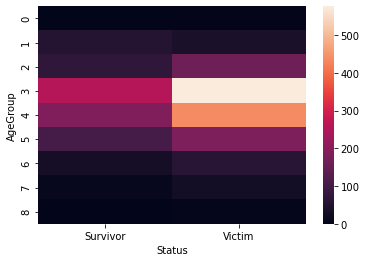

In [59]:
#Тепловая карта - Возростная группа - Статус
sb.heatmap(Age_by_status)

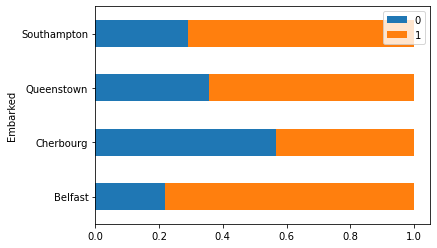

In [60]:
#График вероятнотных соотношений статуса выживания и места посадки неа корабль
Embarked_by_status.apply(map_to_percent,axis=1,result_type='expand').plot(kind='barh',stacked=True)

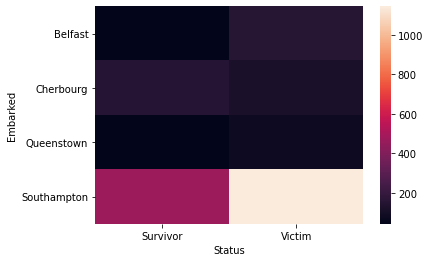

In [61]:
#Тепловая карта - Место посадки - Статус
sb.heatmap(Embarked_by_status)

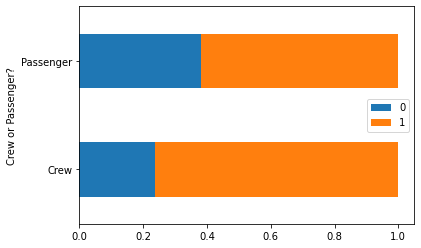

In [62]:
#График вероятнотных соотношений статуса выживания и роли на корабле
Cr_or_pas_by_status.apply(map_to_percent,axis=1,result_type='expand').plot(kind='barh',stacked=True)

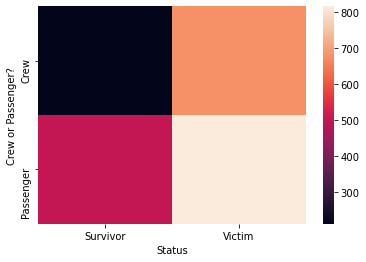

In [63]:
#Тепловая карта - Роль на корабле- Статус
sb.heatmap(Cr_or_pas_by_status)

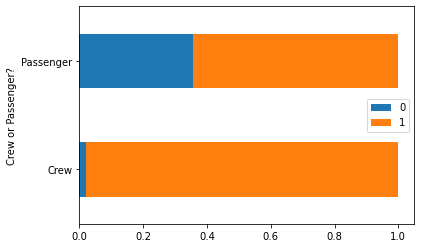

In [64]:
#График вероятнотных соотношений гендера и роли на корабле
Cr_or_pas_by_gender.apply(map_to_percent,axis=1,result_type='expand').plot(kind='barh',stacked=True)

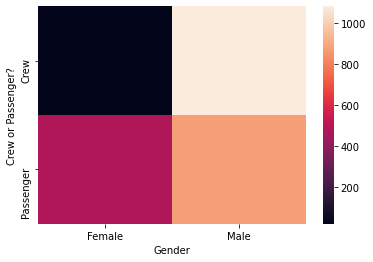

In [66]:
#Тепловая карта - Роль на корабле - Гендер
sb.heatmap(Cr_or_pas_by_gender) 